In [17]:
# NMF vs PCA with images

# Non-negative matrix factorization (NMF)
# Principal Component Analysis (PCA)
# using NMF to decompose grayscale images into their commonly occurring patterns. 
# 100 images as 2D array samples, where each row represents a single 13x8 image. 

# pip3 install numpy
# pip3 install matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, PCA

# load up the array
data_arr = np.loadtxt('/Users/alexandergursky/Local_Repository/Datasets/Structured/CSV/lcd-digits.csv', delimiter=',')

In [18]:
# Select the 0th row: digit
digit = data_arr[0,:]

# Print digit
print(digit)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


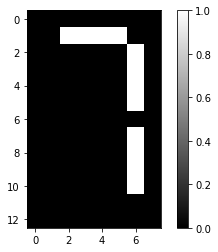

In [20]:
# Use plt.imshow to display the bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [21]:
# Creating a function to do what we just did, but in one clean step
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

/Users/alexandergursky/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


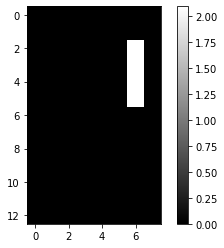

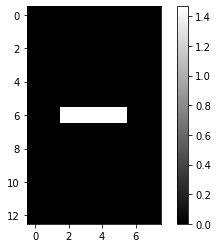

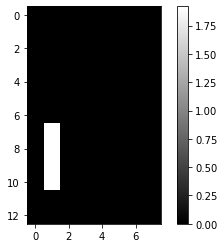

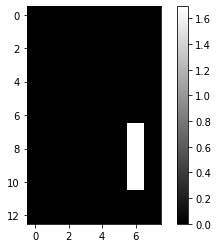

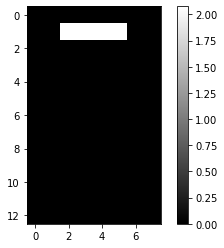

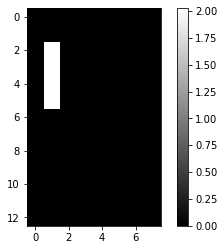

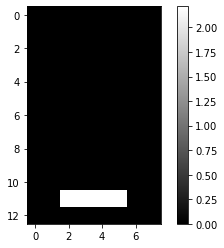

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37540618e-16]


In [22]:
# Creating an NMF instance
model = NMF(n_components=7)  # 7 is the number of cells in an LED display

# Fitting and transforming the data
features = model.fit_transform(data_arr)

# Calling on the function we just created to be used in a for loop over the components in the model (ie. 7)
# This is going to loop over the 7 components in the model, on each iteration it will pass the value que'd 
# into the function I created, then reshape that and display it as an image/plot.
for component in model.components_:
    show_as_image(component)

# Selecting the 0th row of features
digit_features = features[0,:]

# Printing digit_features, this shows the numeric value of the image created.
print(digit_features)

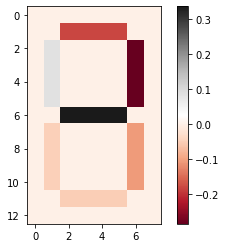

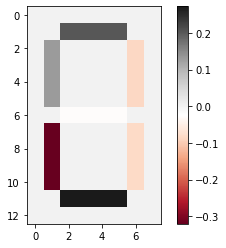

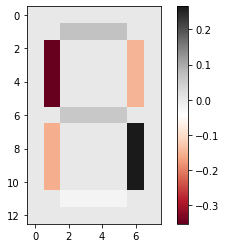

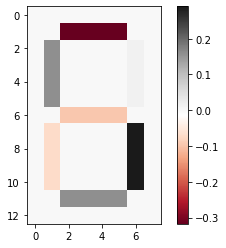

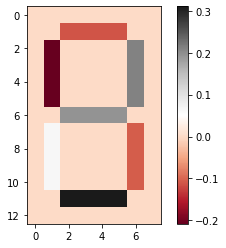

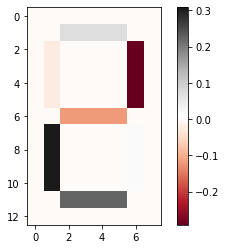

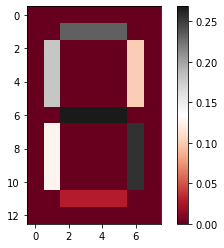

In [28]:
# The point of what you just now have seen is this: We cycled through the set of numbers in the original array
# each time we applied the NMF, we placed components at 7 as there are 7 cells in a display.
# With that understood, consider that the bitmap is (13,8), which means that the blocks/cells that you see
# are NOT created by me. What is happening here is that we know there are 7 cells in a display so naturally
# we need to somehow tell NMF to group in 7 components. We did this when we created the instance of NMF. 
# Because we told it to create 7 groupings, it cycled through the dataset and kicked-out the 7 
# components/locations that it found. This demostrates that NMF can 'learn' something about data in an 
# unsupervised mannor. It was able to display the 7 regions in the plot that it 'believes' hold significance.

# Lets compare both NMF and PCA.
# Unlike NMF, PCA doesn't learn the parts of things. 
# Its components do not correspond to topics (in the case of documents), 
# or to parts of images, when trained on images. 

# Create a PCA instance
model = PCA(n_components=7)

# Apply fit_transform 
features = model.fit_transform(data_arr)


# Modified the function just to include another color so 
# we can see why PCA does not do well at extracting interpretable parts or features from the data.
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='RdGy', interpolation='nearest')
    plt.colorbar()
    plt.show()


# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)


# Notice that the components of PCA do not represent meaningful parts of images in the LED digits dataset.
    